<a href="https://colab.research.google.com/github/teonakuzmanovska/Data-Science/blob/master/lab/lab4/lab4_191523.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the current **mean temperature** in the city of Delhi. To accomplish this use data from the past three days, which includes information such as the **mean temperature**, **humidity**, **wind speed**, and **mean pressure**. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast the future mean temperature based on the provided historical data.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [1]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC

Downloading...
From: https://drive.google.com/uc?id=1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC
To: /content/climate-data.csv
100% 78.1k/78.1k [00:00<00:00, 25.1MB/s]


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [2]:
# Write your code here. Add as many boxes as you need.
import pandas as pd

In [50]:
df = pd.read_csv('/content/climate-data.csv')

Explore the dataset using visualizations of your choice.

In [4]:
# Write your code here. Add as many boxes as you need.
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


from matplotlib import pyplot as plt
df['meantemp'].plot(kind='hist', bins=20, title='meantemp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['humidity'].plot(kind='hist', bins=20, title='humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['wind_speed'].plot(kind='hist', bins=20, title='wind_speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['meanpressure'].plot(kind='hist', bins=20, title='meanpressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='meantemp', y='humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='humidity', y='wind_speed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='wind_speed', y='meanpressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['meantemp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('meantemp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['humidity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('humidity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['wind_speed']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('wind_speed')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['meanpressure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('meanpressure')

from matplotlib import pyplot as plt
df['meantemp'].plot(kind='line', figsize=(8, 4), title='meantemp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['humidity'].plot(kind='line', figsize=(8, 4), title='humidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['wind_speed'].plot(kind='line', figsize=(8, 4), title='wind_speed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['meanpressure'].plot(kind='line', figsize=(8, 4), title='meanpressure')
plt.gca().spines[['top', 'right']].set_visible(False)

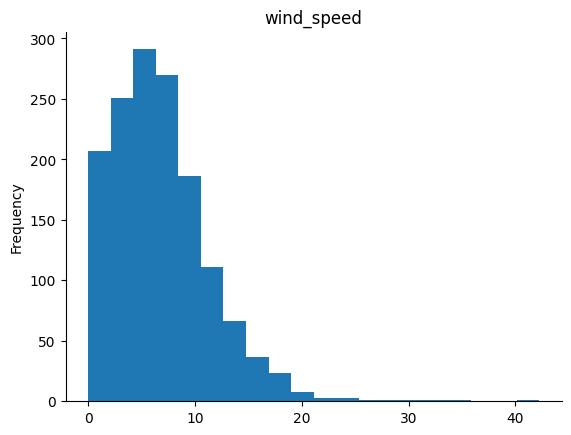

In [5]:
from matplotlib import pyplot as plt
df['wind_speed'].plot(kind='hist', bins=20, title='wind_speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

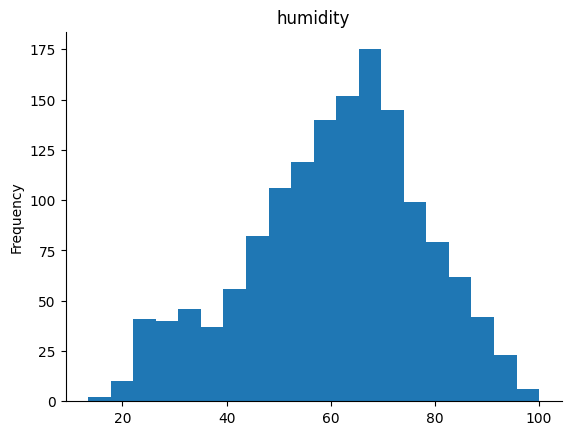

In [6]:
from matplotlib import pyplot as plt
df['humidity'].plot(kind='hist', bins=20, title='humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

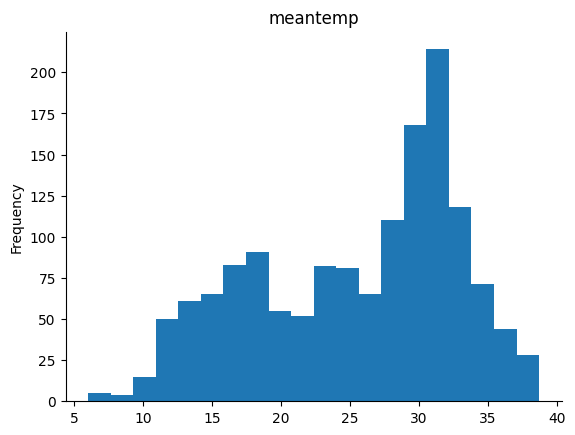

In [7]:
from matplotlib import pyplot as plt
df['meantemp'].plot(kind='hist', bins=20, title='meantemp')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

*Be careful when extracting the features. For each day, ensure that features are obtained sequentially, starting with those from 3 days ago, followed by features from 2 days ago, and finally, features from 1 day ago. This becomes crucial when reshaping the train and test sets later on.*

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [51]:
# Write your code here. Add as many boxes as you need.
df.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [52]:
columns = df.columns

In [53]:
columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [54]:
columns = columns.drop('date')

In [55]:
columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [56]:
for i in range(3,0,-1):
  for column in columns:
    df[f'{column}_lag_{i}'] = df[column].shift(i)

In [57]:
df

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_lag_3,humidity_lag_3,wind_speed_lag_3,meanpressure_lag_3,meantemp_lag_2,humidity_lag_2,wind_speed_lag_2,meanpressure_lag_2,meantemp_lag_1,humidity_lag_1,wind_speed_lag_1,meanpressure_lag_1
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762,14.095238,89.666667,6.266667,1017.904762


In [58]:
df = df.dropna(axis=0)

In [59]:
df

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_lag_3,humidity_lag_3,wind_speed_lag_3,meanpressure_lag_3,meantemp_lag_2,humidity_lag_2,wind_speed_lag_2,meanpressure_lag_2,meantemp_lag_1,humidity_lag_1,wind_speed_lag_1,meanpressure_lag_1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000
7,2013-01-08,8.857143,63.714286,7.142857,1018.714286,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762,14.095238,89.666667,6.266667,1017.904762


In [60]:
Y = df.meantemp

In [61]:
df = df.drop('date', axis=1)

In [62]:
df = df.drop('meantemp', axis=1)

In [63]:
df = df.drop('humidity', axis=1)

In [64]:
df = df.drop('wind_speed', axis=1)

In [65]:
df = df.drop('meanpressure', axis=1)

In [66]:
df

,meantemp_lag_3,humidity_lag_3,wind_speed_lag_3,meanpressure_lag_3,meantemp_lag_2,humidity_lag_2,wind_speed_lag_2,meanpressure_lag_2,meantemp_lag_1,humidity_lag_1,wind_speed_lag_1,meanpressure_lag_1
3,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
4,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
5,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000
6,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000
7,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1457,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
1458,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
1459,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762
1460,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762,14.095238,89.666667,6.266667,1017.904762


In [67]:
Y

3        8.666667
4        6.000000
5        7.000000
6        7.000000
7        8.857143
          ...    
1457    17.217391
1458    15.238095
1459    14.095238
1460    15.052632
1461    10.000000
Name: meantemp, Length: 1459, dtype: float64

In [68]:
X = df

In [69]:
X

,meantemp_lag_3,humidity_lag_3,wind_speed_lag_3,meanpressure_lag_3,meantemp_lag_2,humidity_lag_2,wind_speed_lag_2,meanpressure_lag_2,meantemp_lag_1,humidity_lag_1,wind_speed_lag_1,meanpressure_lag_1
3,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
4,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
5,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000
6,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000
7,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1457,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
1458,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
1459,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762
1460,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762,14.095238,89.666667,6.266667,1017.904762


## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [70]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle = False)

## Feauture Scaling
Scale the extracted features using an appropriate scaler.

In [73]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler()

In [76]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [78]:
# Write your code here. Add as many boxes as you need.
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [80]:
X_train.shape

(1167, 1, 12)

In [81]:
X_test.shape

(292, 1, 12)

## Long Short-Term Memory (LSTM) Network
Build a Long Short-Term Memory (LSTM) Network for forecasting the current **mean temperature** based on the extracted features from the previous three days.

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [84]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [85]:
model = Sequential()
model.add(LSTM(100,  activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(50,  activation='relu',dropout=0.1))
model.add(Dense(1, activation='linear'))

Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [86]:
# Write your code here. Add as many boxes as you need.
import keras

In [87]:
model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()])

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [88]:
# Write your code here. Add as many boxes as you need.
history = model.fit(X_train, Y_train, batch_size=16, validation_split=0.2, epochs=20, shuffle=False)

Epoch 1/20
59/59 [==============================] - 7s 17ms/step - loss: 663.1595 - mean_squared_error: 663.1595 - mean_absolute_error: 24.6316 - val_loss: 469.0973 - val_mean_squared_error: 469.0973 - val_mean_absolute_error: 20.6497
Epoch 2/20
59/59 [==============================] - 1s 9ms/step - loss: 267.8440 - mean_squared_error: 267.8440 - mean_absolute_error: 13.8473 - val_loss: 52.0916 - val_mean_squared_error: 52.0916 - val_mean_absolute_error: 6.1819
Epoch 3/20
59/59 [==============================] - 1s 9ms/step - loss: 80.5765 - mean_squared_error: 80.5765 - mean_absolute_error: 7.5892 - val_loss: 28.9776 - val_mean_squared_error: 28.9776 - val_mean_absolute_error: 4.5477
Epoch 4/20
59/59 [==============================] - 1s 9ms/step - loss: 50.6567 - mean_squared_error: 50.6567 - mean_absolute_error: 5.9362 - val_loss: 17.8131 - val_mean_squared_error: 17.8131 - val_mean_absolute_error: 3.4647
Epoch 5/20
59/59 [==============================] - 1s 9ms/step - loss: 30.639

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

In [89]:
# Write your code here. Add as many boxes as you need.
import matplotlib.pyplot as plt

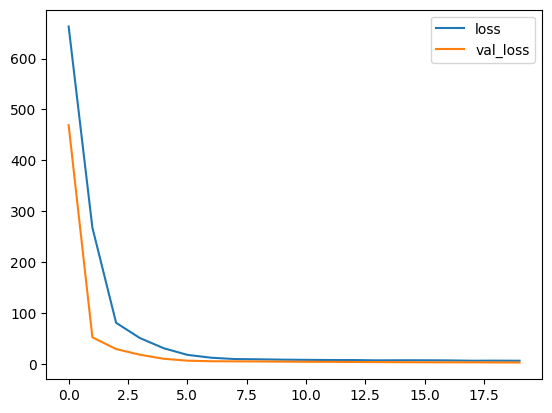

In [90]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

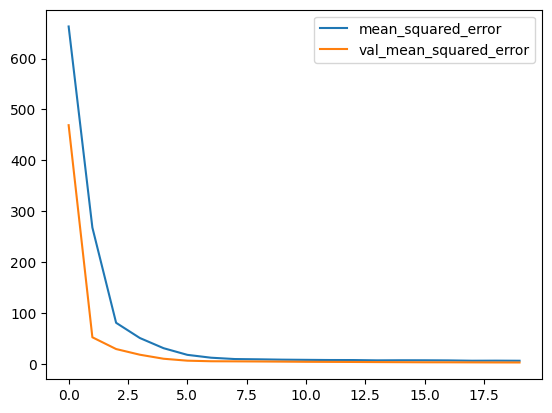

In [91]:
plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
plt.plot(history.history['val_mean_squared_error'], label='val_mean_squared_error')
plt.legend()
plt.show()

Use the trained model to make predictions for the test set.

In [92]:
# Write your code here. Add as many boxes as you need.
preds = model.predict(X_test)

10/10 [==============================] - 1s 4ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [97]:
# Write your code here. Add as many boxes as you need.
mean_squared_error(preds, Y_test), mean_absolute_error(preds, Y_test), r2_score(preds, Y_test)

(1102.2624843864176, 5.9609730305499475, 0.012071765829092196)

Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

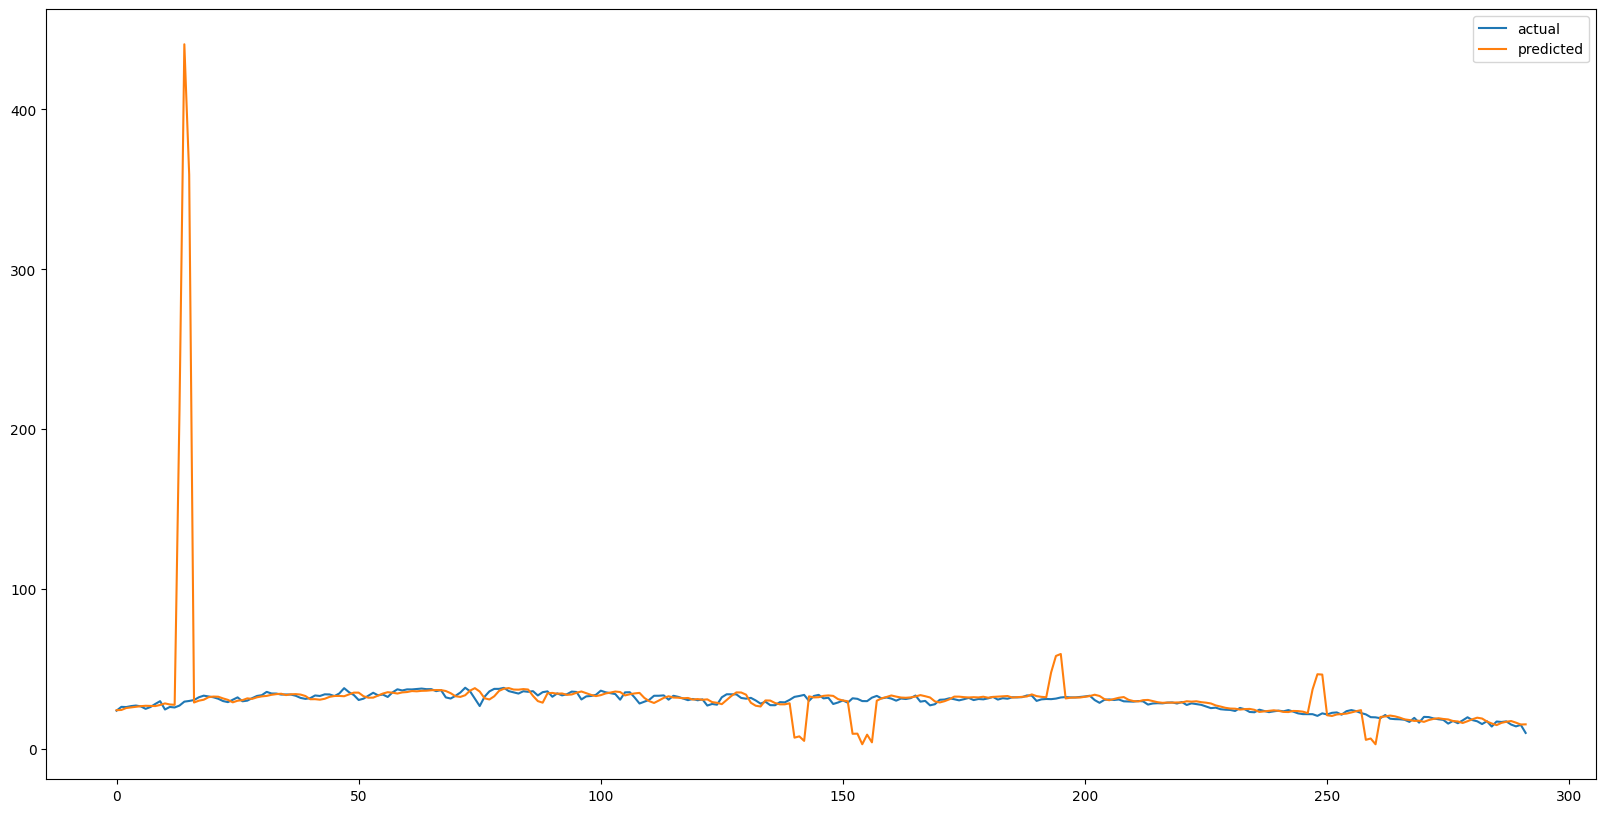

In [98]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to perform a sentiment analysis on a dataset consisting of wine reviews. The dataset contains two attributes: **description* and **points**. The description is a brief text describing the wine and the points which represents a quality metric ranging from 1 to 100. If some wine has at least 90 points it is considered **exceptional**. Your task involves predicting if some wine is exceptional based on its review.

The greater part of the code for the solution is already given. You need to define a tokenizer to tokenize the given texts and a deep neural network model that will be used for the classification task at hand. Fill in only the missing code blocks.

## Requirements

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Downloading the Wine Reviews Dataset

In [6]:
!gdown 1fz9449M9Owofy6CYrKzkGwXKesI32B8u

Downloading...
From: https://drive.google.com/uc?id=1fz9449M9Owofy6CYrKzkGwXKesI32B8u
To: /content/wine-reviews.csv
100% 32.5M/32.5M [00:00<00:00, 205MB/s]


## Exploring the Climate Dataset

Load the dataset into a `pandas` data frame.

In [7]:
df = pd.read_csv('wine-reviews.csv')

In [8]:
df.head()

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


## Feature Extraction

Extract the feature `exceptional` for each wine review.

In [9]:
df['exceptional'] = df['points'].apply(lambda elem: 1 if elem >= 90 else 0)

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [10]:
X, y = df['description'], df['exceptional']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Text Tokenization

Use tokenizer to convert raw text into a sequence of tokens.

In [12]:
# Write your code here. Add as many boxes as you need.
df['num_words'] = df['description'].apply(lambda x: len(x.split(" ")))

In [13]:
max_tokens = 64

In [14]:
from keras.preprocessing.text import Tokenizer

In [15]:
tokenizer = Tokenizer(num_words=max_tokens)
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

## Padding
Pad each sequence to maximum length of 16.

In [16]:
# Write your code here. Add as many boxes as you need.
X_train = sequence.pad_sequences(X_train, maxlen=16)
X_test = sequence.pad_sequences(X_test, maxlen=16)

## Deep Neural Network

Define Deep Neural Network model to predict if a specific wine is exceptional or not based on the tokenized and padded wine reviews.

In [17]:
# Write your code here. Add as many boxes as you need.
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
y

0         0
1         0
2         0
3         0
4         0
         ..
129966    1
129967    1
129968    1
129969    1
129970    1
Name: exceptional, Length: 129971, dtype: int64

In [19]:
model = Sequential()
model.add(Embedding(max_tokens, 32, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='softmax'))

Compile the previously defined model specifying loss function, optimizer and evaluation metrics.

In [20]:
# Write your code here. Add as many boxes as you need.
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

Fit the compiled model on the train set specifying the percent for validation, batch_size, and number of epochs.

In [21]:
# Write your code here. Add as many boxes as you need.
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1300/1300 [==============================] - 38s 21ms/step - loss: 0.0000e+00 - precision: 0.3769 - recall: 1.0000 - val_loss: 0.0000e+00 - val_precision: 0.3750 - val_recall: 1.0000
Epoch 2/10
1300/1300 [==============================] - 27s 20ms/step - loss: 0.0000e+00 - precision: 0.3769 - recall: 1.0000 - val_loss: 0.0000e+00 - val_precision: 0.3750 - val_recall: 1.0000
Epoch 3/10
1300/1300 [==============================] - 26s 20ms/step - loss: 0.0000e+00 - precision: 0.3769 - recall: 1.0000 - val_loss: 0.0000e+00 - val_precision: 0.3750 - val_recall: 1.0000
Epoch 4/10
1300/1300 [==============================] - 26s 20ms/step - loss: 0.0000e+00 - precision: 0.3769 - recall: 1.0000 - val_loss: 0.0000e+00 - val_precision: 0.3750 - val_recall: 1.0000
Epoch 5/10
1300/1300 [==============================] - 27s 20ms/step - loss: 0.0000e+00 - precision: 0.3769 - recall: 1.0000 - val_loss: 0.0000e+00 - val_precision: 0.3750 - val_recall: 1.0000
Epoch 6/10
1300/1300 [===================

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

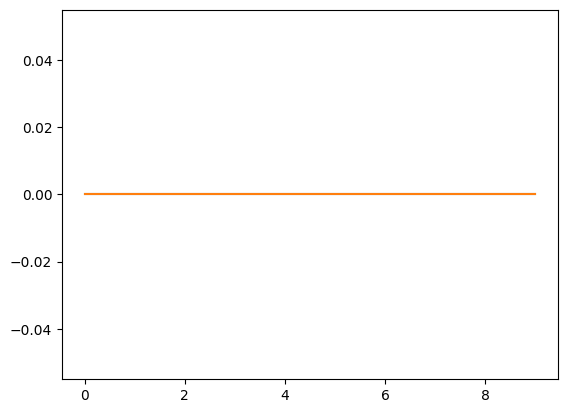

In [22]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

Use the trained model to make predictions for the test set.

In [23]:
y_pred = model.predict(X_test)

813/813 [==============================] - 3s 3ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [24]:
print(classification_report(y_test, np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     16100
           1       0.38      1.00      0.55      9895

    accuracy                           0.38     25995
   macro avg       0.19      0.50      0.28     25995
weighted avg       0.14      0.38      0.21     25995



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
